* SVM with python

https://qiita.com/altescy/items/60a6def66f13267f6347

* mlxtend 

https://qiita.com/altescy/items/60a6def66f13267f6347


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#必要なライブラリを import 
from sklearn import datasets
import numpy as np

# アヤメデータセットを用いる
iris = datasets.load_iris()

# 例として、3,4番目の特徴量の2次元データで使用
X = iris.data[:, [2,3]]
#クラスラベルを取得
y = iris.target

In [8]:
X.shape

(150, 2)

In [9]:
y.shape

(150,)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler 

# トレーニングデータとテストデータに分割。
# 今回は訓練データを70%、テストデータは30%としている。
# 乱数を制御するパラメータ random_state は None にすると毎回異なるデータを生成する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None )

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/root/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
X_train_std.max(),X_train_std.min()
X_train.max(),    X_train.min()

(6.9000000000000004, 0.10000000000000001)

In [3]:
from sklearn.svm import SVC
# 線形SVMのインスタンスを生成
model = SVC(kernel='linear', random_state=None)

# モデルの学習。fit関数で行う。
model.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 0.96


In [5]:
# テストデータに対する精度
pred_test = model.predict(X_test_std)
accuracy_test = accuracy_score(y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)

テストデータに対する正解率： 0.96


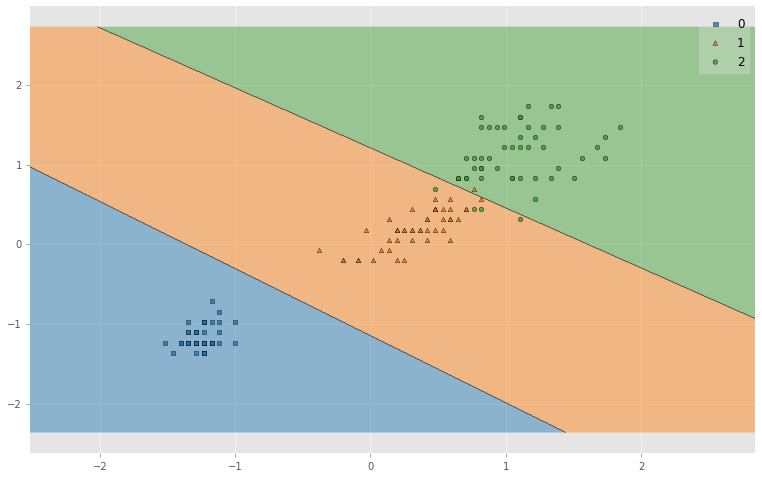

In [6]:
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()